In [69]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib notebook

In [41]:
scan_list_red = []
for image_num in range(1,19,1):
    scan_list_red.append(np.loadtxt('/home/qsimexpcontrol/LabRAD/data/velocity_class.dir/00247 - velocity_class.dir/' + str(image_num).zfill(5) + ' - stacked_images - ' + '00247 - velocity_class.csv', delimiter=','))

    
scan_list_blue = []
for image_num in range(1,5,1):
    scan_list_blue.append(np.loadtxt('/home/qsimexpcontrol/LabRAD/data/velocity_class.dir/00242 - velocity_class.dir/' + str(image_num).zfill(5) + ' - stacked_images - ' + '00242 - velocity_class.csv', delimiter=','))


<IPython.core.display.Javascript object>


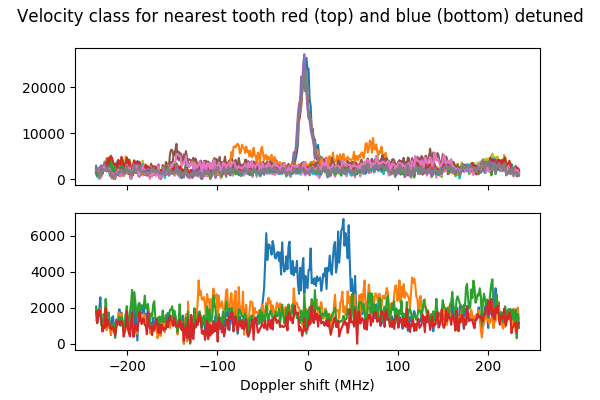

In [132]:
%matplotlib notebook
cm = plt.get_cmap('Reds')
f, ax = plt.subplots(2, sharex=True)
plt.suptitle('Velocity class for nearest tooth red (top) and blue (bottom) detuned', fontsize=12)
plt.xlabel('Doppler shift (MHz)')
for i, scan in enumerate(scan_list_red):
    x = scan[:,0]
    y = scan[:,1]
    ax[0].plot(x/1e6,y)
cm = plt.get_cmap('cool')
for i, scan in enumerate(scan_list_blue):
    x = scan[:,0]
    y = scan[:,1]
    ax[1].plot(x/1e6,y)
#plt.savefig('/home/qsimexpcontrol/plots/phonon_laser/velocity_classes.pdf')

<IPython.core.display.Javascript object>


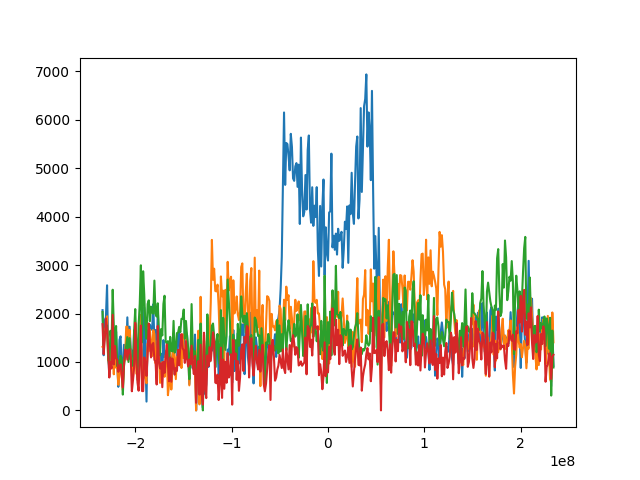

In [35]:
for scan in scan_list:
    x = scan[:,0]
    y = scan[:,1]
    plt.plot(x,y)

In [29]:
def gaussianfunc(x, x0, sigma, A, offset):
    return A*np.exp((-0.5*((x - x0)/sigma)**2)) + offset
def oscillator_func(x, x0, A1, A2, offset):
        value = A1*1/(np.sqrt(1-((x-x0)/A2)**2)) + offset
        where_are_NaNs = np.isnan(value)
        value[where_are_NaNs] = offset
        return value

In [ ]:
%matplotlib inline
mean_dist = []
for i, item in enumerate(summed):
    if i in [0,1,2, 3, 7,8,9]:
        plt.plot(x - 23.2, item, linewidth= 1, label=str(freq[i])[0:3] + ' MHz')
        gaussfit1, pcov1 = curve_fit(gaussianfunc, x - 23.2, item, p0=[0.0,3.0, 70000, 50000])
        plt.plot(x-23.2, gaussianfunc(x-23.2, gaussfit1[0], gaussfit1[1], gaussfit1[2], gaussfit1[3]))
        mean_dist.append(gaussfit1[1])
        print gaussfit1[1]
#    elif i == 2:
#        plt.plot(x - 23.2, item, linewidth= 1, label=str(freq[i])[0:3] + ' MHz')
#        oscfit, pcov1 = curve_fit(oscillator_func, x-23.2, item, p0=[0.0,10000,6.0,53000])
#        plt.plot(x-23.2, oscillator_func(x-23.2, oscfit[0], oscfit[1], oscfit[2], oscfit[3]))
#        print oscfit[2]
    else:
        plt.plot(x - 23.2, item, linewidth= 1, label=str(freq[i])[0:3] + ' MHz')
        oscfit, pcov1 = curve_fit(oscillator_func, x-23.2, item, p0=[0.0,10000,4.0,53000])
        plt.plot(x-23.2, oscillator_func(x-23.2, oscfit[0], oscfit[1], oscfit[2], oscfit[3]))
        mean_dist.append(oscfit[2])
        print oscfit[2]
    plt.show()